0: empty, 1: oil, 2: vinegar, 3: water

In [1]:
import glob, os

In [2]:
## 导入数据
matls = ['empty', 'oil', 'vinegar', 'water']
dfs = []
for matl in matls:
    df_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_%s_aligned.csv' % matl)
    df_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_%s_aligned.csv' % matl)
    dfs.append({'front': df_f, 'tail': df_t})
    print(matl, len(df_f), len(df_t))

empty 377 377
oil 400 400
vinegar 260 260
water 400 400


In [3]:
## 补齐数据
set_dists = set()
set_freqs = set()
for i in range(0, 4):
    set_dists = set_dists | set(dfs[i]['front']['DISTANCE'].unique()) | set(dfs[i]['tail']['DISTANCE'].unique())
    set_freqs = set_freqs | set(dfs[i]['front']['CHANNEL'].unique()) | set(dfs[i]['tail']['CHANNEL'].unique())

set_dists = sorted(set_dists)
set_freqs = sorted(set_freqs)

# print(len(set_dists))
# print(len(set_freqs))

combined = [set_dists, set_freqs]
cols = ['DISTANCE', 'CHANNEL']
mind = pd.MultiIndex.from_product(combined, names=cols)

for i in range(0, 4):
    dfs[i]['front'] = dfs[i]['front'].set_index(cols).reindex(mind, fill_value=np.nan).reset_index()
    dfs[i]['tail'] = dfs[i]['tail'].set_index(cols).reindex(mind, fill_value=np.nan).reset_index()
    print(i, len( dfs[i]['front']), len( dfs[i]['tail']))

0 400 400
1 400 400
2 400 400
3 400 400


In [5]:
rssi_diff = []
phase_diff = []
for i in range(0, 4):
    rssi_diff.append(dfs[i]['front']['RSSI'] - dfs[i]['tail']['RSSI'])
    phase_diff.append(dfs[i]['front']['PHASE'] - dfs[i]['tail']['PHASE'])

In [14]:
channels = np.arange(902.75, 927.25, 0.5) 
channels = np.tile(channels, 8)

array([902.75, 903.25, 903.75, 904.25, 904.75, 905.25, 905.75, 906.25,
       906.75, 907.25, 907.75, 908.25, 908.75, 909.25, 909.75, 910.25,
       910.75, 911.25, 911.75, 912.25, 912.75, 913.25, 913.75, 914.25,
       914.75, 915.25, 915.75, 916.25, 916.75, 917.25, 917.75, 918.25,
       918.75, 919.25, 919.75, 920.25, 920.75, 921.25, 921.75, 922.25,
       922.75, 923.25, 923.75, 924.25, 924.75, 925.25, 925.75, 926.25,
       926.75, 902.75, 903.25, 903.75, 904.25, 904.75, 905.25, 905.75,
       906.25, 906.75, 907.25, 907.75, 908.25, 908.75, 909.25, 909.75,
       910.25, 910.75, 911.25, 911.75, 912.25, 912.75, 913.25, 913.75,
       914.25, 914.75, 915.25, 915.75, 916.25, 916.75, 917.25, 917.75,
       918.25, 918.75, 919.25, 919.75, 920.25, 920.75, 921.25, 921.75,
       922.25, 922.75, 923.25, 923.75, 924.25, 924.75, 925.25, 925.75,
       926.25, 926.75, 902.75, 903.25, 903.75, 904.25, 904.75, 905.25,
       905.75, 906.25, 906.75, 907.25, 907.75, 908.25, 908.75, 909.25,
      

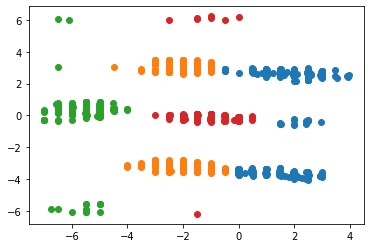

In [16]:
for i in range(0, 4):
    plt.scatter(rssi_diff[i], phase_diff[i])

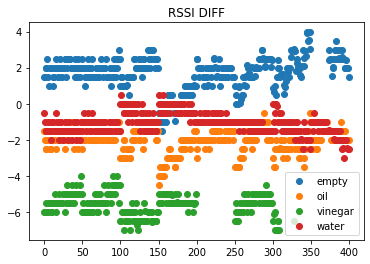

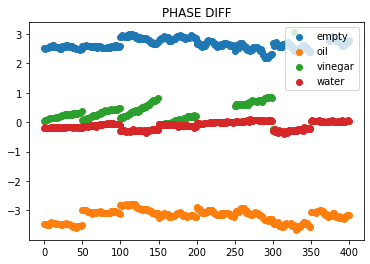

In [62]:
for s in rssi_diff:
    plt.scatter(range(len(s)), s)
plt.title('RSSI DIFF')
plt.legend(matls)
plt.show()

for s in phase_diff:
    plt.scatter(range(len(s)), s)
plt.title('PHASE DIFF')
plt.legend(matls)
plt.show()

In [33]:
print(set_dists)

[50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0]


In [42]:
## 清理空瓶的数据
w_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_f_empty_aligned.csv')
w_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail\\outdoor_all_t_empty_aligned.csv')
w_f_120 = w_f.groupby('DISTANCE').get_group(120)
w_t_120 = w_t.groupby('DISTANCE').get_group(120)

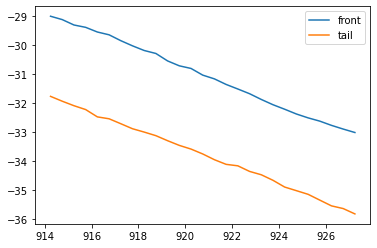

In [55]:
plt.plot(w_f_120['CHANNEL'], w_f_120['PHASE'])
plt.plot(w_t_120['CHANNEL'], w_t_120['PHASE'] - 6*2*np.pi)
plt.legend(['front', 'tail'])

In [67]:
## 导出数据

import scipy.io
scipy.io.savemat('heatail_diff.mat', {'e_r': rssi_diff[0].values, 'o_r': rssi_diff[1].values, 'v_r': rssi_diff[2].values, 'w_r': rssi_diff[3].values,
                                     'e_p': phase_diff[0].values, 'o_p': phase_diff[1].values, 'v_p': phase_diff[2].values, 'w_p': phase_diff[3].values})

In [65]:
rssi_diff[0].values

array([ 1.49748744e+00,  1.50251256e+00,  2.00000000e+00,  2.00251256e+00,
        2.49497487e+00,  1.50000000e+00,  1.00000000e+00,  1.99748744e+00,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  1.50000000e+00,
        1.00000000e+00,  1.50251256e+00,  2.00251256e+00,  2.50000000e+00,
        2.00502513e+00,  2.00000000e+00,  1.50251256e+00,  1.50000000e+00,
        2.00000000e+00,  2.50000000e+00,  2.00000000e+00,  1.99748744e+00,
        1.50000000e+00,  2.00000000e+00,  2.00000000e+00,  2.50000000e+00,
        2.50000000e+00,  1.50000000e+00,  2.00000000e+00,  2.50000000e+00,
        2.50000000e+00,  2.50000000e+00,  2.49748744e+00,  2.00000000e+00,
        1.99497487e+00,  2.00000000e+00,  2.00000000e+00,  2.00251256e+00,
        2.50000000e+00,  1.50000000e+00,  1.99748744e+00,  1.50000000e+00,
        1.99748744e+00,  2.50000000e+00,  2.00000000e+00,  1.50000000e+00,
        2.00000000e+00,  2.49497487e+00,  1.99748744e+00,  2.00000000e+00,
        1.99497487e+00,  